## Jupyter notebook for clustering dynamical ATAC-seq data by Gaussian process hierarchical clustering method

This notebook is the code for clustering ATAC-seq data and produce Fig. 2b used in the paper 
**"Simultaneous analysis of open chromatin, promoter interactions and gene expression in stimulated T cells implicates causal genes for rheumatoid arthritis"** 
by *Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Xiangyu Ge, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre*.

Author : *Jing Yang*  <br />
Date: 24-10-2019 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

### load packages required for later clustering

In [1]:
import numpy as np
import pylab as pb
import pandas as pd
import matplotlib.patches as patches
from matplotlib import pyplot as plt
%matplotlib inline
import sys
import GPy
from GPy import kern ### GPy package for GP regression
import GPclust ### GP clustering package for data clustering
from GPclust import MOHGP
pb.ion()


In [2]:
np.random.seed(1) ### setup random seed

### load the data for clustering. ATACseq data here are dynamical data with LR<-1 and outside TSS region

In [3]:
data = np.loadtxt('data/ATACseq_forcluster.csv', delimiter=',',skiprows=1, usecols=range(4,10))


In [4]:
data.shape

(9680, 6)

### normalize the data

In [5]:
data_tmp = data.T - data.T.mean(axis=0)
data_tmp = data_tmp / data_tmp.std(axis=0)
data_normalized = data_tmp.T

### start GP clustering

In [6]:
times_new = np.array((0,1,2,3,4,5))
kern_cluster = GPy.kern.Matern32(input_dim=1, variance=1., lengthscale=5.)
kern_gene = GPy.kern.Matern32(input_dim=1, variance=0.1, lengthscale=2.) + GPy.kern.White(1,0.001)
X = times_new[:,None]
alpha =0.1 ### DP concentration
Nclust = 6 ### initial number of clusters
m = MOHGP(X,kern_cluster,kern_gene,data_normalized,K=Nclust)
m.optimize()
print(m)

 /home/mqbssjy5/.local/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning:The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.


iteration 1 bound=-583252.5526051467 grad=6730.73770444091, beta=0
iteration 2 bound=-482268.964704163 grad=2699103.240400895, beta=44.62328654251587
iteration 3 bound=-313511.15935727285 grad=123847.07472792367, beta=0.0
iteration 4 bound=-302718.79842209525 grad=28201.071037388418, beta=0.0
iteration 5 bound=-299536.50490928086 grad=4078.6252119872765, beta=0.0
iteration 6 bound=-297403.99028361787 grad=2284.2916281157873, beta=0.17513509229690277
iteration 7 bound=-295947.89573446166 grad=1472.6576511706667, beta=0.0
iteration 8 bound=-294331.0629552655 grad=1645.2032772745165, beta=0.0
iteration 9 bound=-290975.75450133136 grad=1743.1143645325303, beta=1.2987052583384133
iteration 10 bound=-289623.0261183505 grad=1315.8773519647102, beta=0.0
iteration 11 bound=-288185.06304115854 grad=1487.246762173854, beta=0.0
iteration 12 bound=-284766.66544250346 grad=1549.8408615726103, beta=1.7978636261117726
iteration 13 bound=-282997.26181051193 grad=1868.2991908687065, beta=0.0
iteration 1

iteration 51 bound=-66851.0365623523 grad=641.8078147010368, beta=0.0
iteration 53 bound=-66271.81339527346 grad=825.6875622319952, beta=29.101070769799186
iteration 54 bound=-66036.13904943423 grad=226.12952957026584, beta=0.3779750504522376
iteration 55 bound=-65966.38843808242 grad=67.71160507532434, beta=0.08923755269310284
iteration 56 bound=-65901.8840020468 grad=45.410725620362626, beta=0.4763242916873058
iteration 57 bound=-65859.90480806245 grad=30.74677540594385, beta=0.30130500145959915
iteration 58 bound=-65823.69142150077 grad=21.528457573569725, beta=0.5917497921638258
iteration 59 bound=-65802.07628103334 grad=12.452438641418919, beta=0.4737178956706706
iteration 60 bound=-65789.7662667915 grad=7.85935230418745, beta=0.34250113848074554
iteration 61 bound=-65780.02907709814 grad=6.2749058679543035, beta=0.37192546585085995
iteration 62 bound=-65770.514798838 grad=5.460695260843026, beta=0.497150859851821
iteration 63 bound=-65761.00006683695 grad=4.799110364286306, beta=

iteration 102 bound=-60594.789135292944 grad=3048.6012106646467, beta=341422.12524295377
iteration 103 bound=-60453.48287025626 grad=158.13674290762003, beta=0.05544676516092306
iteration 104 bound=-60346.51888401738 grad=92.44368603616734, beta=0.18540260860757846
iteration 105 bound=-60228.82665294055 grad=76.43568406811579, beta=0.5099206077369232
iteration 106 bound=-60140.98715262358 grad=57.573739526390625, beta=0.43249929879962457
iteration 107 bound=-60084.8021259672 grad=34.99251572356052, beta=0.5190258984782745
iteration 108 bound=-60062.32455030012 grad=14.580723391435724, beta=0.4626461446156819
iteration 109 bound=-60057.3378513109 grad=3.745693431436422, beta=0.3411778741162205
iteration 110 bound=-60056.368034724306 grad=0.8833304598880022, beta=0.2135423828335619
iteration 111 bound=-60055.85073500294 grad=0.47146230702844527, beta=0.1598831347380873
iteration 112 bound=-60055.28211445082 grad=0.34762768472407374, beta=0.6290039815608522
iteration 113 bound=-60054.8085

iteration 133 bound=-59099.32493372456 grad=187.904171322946, beta=84863.12677355835
iteration 134 bound=-59094.06073592449 grad=7.036643854881682, beta=0.07219638850608472
iteration 135 bound=-59092.4114645071 grad=1.8954106910106865, beta=0.09729202433655805
iteration 136 bound=-59091.53225448147 grad=0.7095151497530598, beta=0.4173151395216147
iteration 137 bound=-59091.178264244845 grad=0.3322501414126491, beta=0.13864599002160796
iteration 138 bound=-59090.88230660163 grad=0.1974791109129936, beta=0.48730374467454834
iteration 139 bound=-59090.68415166254 grad=0.13514910688676796, beta=0.3242644895938979
iteration 140 bound=-59090.48104828424 grad=0.09973299506401605, beta=0.6996270456633331
iteration 141 bound=-59090.325800001185 grad=0.07052088690537141, beta=0.5550023203482286
iteration 142 bound=-59090.19081424324 grad=0.05189031545689204, beta=0.6994049477386267
iteration 143 bound=-59090.088560058015 grad=0.03648510094537526, beta=0.636823060409751
iteration 144 bound=-59090

iteration 151 bound=-59087.65290511062 grad=0.2708190013425727, beta=0.0
iteration 152 bound=-59087.65027610577 grad=0.0034288784945371836, beta=0.03738125578898255
iteration 153 bound=-59087.64891065671 grad=0.001623372177785902, beta=0.0
iteration 154 bound=-59087.6477552032 grad=0.0009408907075970367, beta=0.3217363522632383
iteration 155 bound=-59087.64670045285 grad=0.0006761051425224338, beta=0.49949512079394043
iteration 156 bound=-59087.64579262129 grad=0.0004455738358456109, beta=0.6417947982554586
iteration 157 bound=-59087.64521312468 grad=0.00029922270139835566, beta=0.43142371008397673
iteration 158 bound=-59087.64468053025 grad=0.00023336008561615897, beta=0.6642044836285032
iteration 159 bound=-59087.64422306321 grad=0.0001761275724618895, beta=0.6721477475774583
iteration 160 bound=-59087.643841473066 grad=0.0001322182051987516, beta=0.6930577803455763
iteration 161 bound=-59087.643522439095 grad=9.45066554489748e-05, beta=0.7622855361650618
iteration 162 bound=-59087.6


Name : MOHGP
Objective : 59087.63307169337
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  MOHGP.                 |                  value  |  constraints  |  priors
  Mat32.variance         |     0.9639272276702535  |      +ve      |        
  Mat32.lengthscale      |     1.5943244020852267  |      +ve      |        
  sum.Mat32.variance     |    0.27272383348911455  |      +ve      |        
  sum.Mat32.lengthscale  |    0.07303554181400583  |      +ve      |        
  sum.white.variance     |  2.234773835362837e-08  |      +ve      |        


### show clustering result

 /home/mqbssjy5/.local/lib/python3.6/site-packages/GPy/plotting/matplot_dep/util.py:79: MatplotlibDeprecationWarning:Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


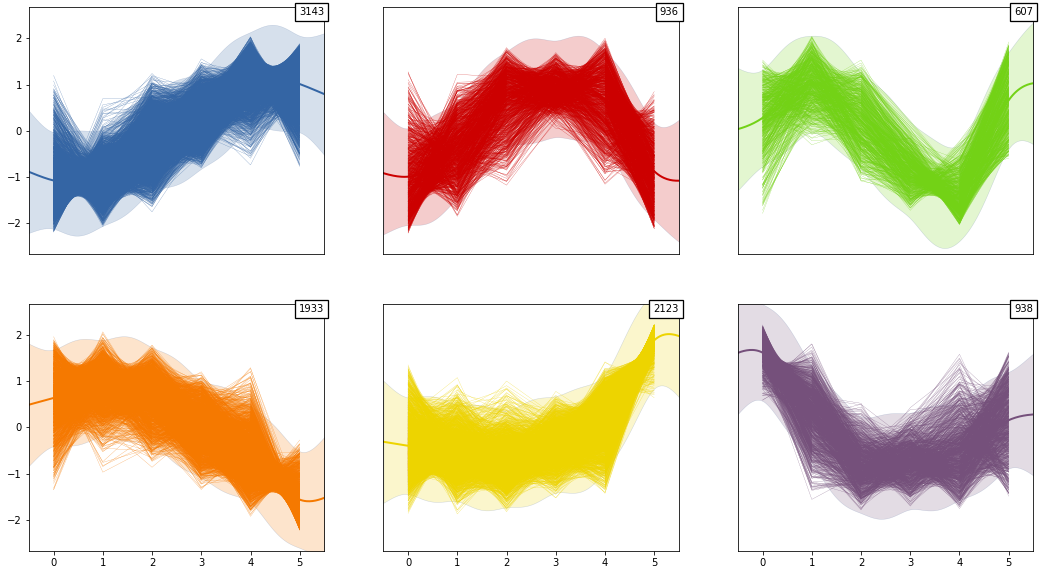

In [7]:
m.reorder()
fig = plt.figure(figsize=(18,10))
m.plot(on_subplots=True, colour=True, newfig=False)

### save cluster results

In [8]:
cluster_result = m.phi.argmax(1)

### show MOTIF results on the clusters. MOTIFs were searched by findMotifGenome.pl from HOMER

In [9]:
motif00 = ('Fra1', 'Atf3', 'Fra2','AP-1', 'Jun-AP1')
motif01 = ('JunB','Fosl2','BATF','Bach2',' NFAT:AP1')
motif10 = ('ETV1', 'Etv2', 'ERG','Fli1','Bach2','Fra2')
#motif11 = ('EWS:ERG-fusion','','DMRT6','HIC1','EWS:FLI1-fusion')
motif2 = ('CTCF','BORIS','DLx3')
motif31 = ('RFX','Rfx2','Rfx1','Rfx5','X-box')
motif32 = ('BORIS','Foxo3','FOXK2',' ETS:RUNX1')
motif41 = ('BATF','Atf3','Fra1','JunB', 'Jun-AP1')
motif42 = ('Fra2','Fosl2','AP-1','bZIP','IRF:BATF')
motif5 = ('CTCF','BORIS')

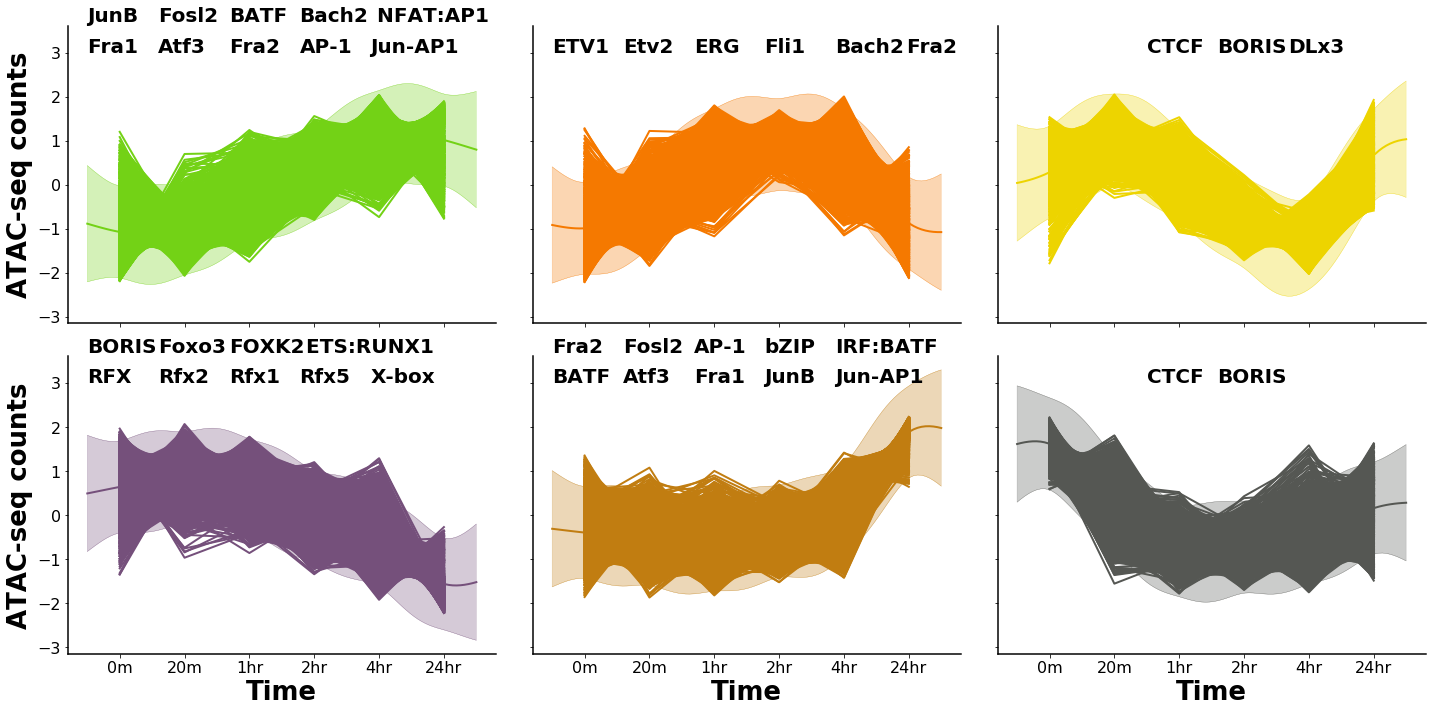

In [12]:
Xnew = np.linspace(X.min()-0.5, X.max()+0.5, 100)[:,None]
fig, ax = plt.subplots(2, 3, figsize=(20,10), sharex=True, sharey=True)
for ii in range(6):
    lower_tmp = m.predict_components(Xnew)[0][ii]-2*np.sqrt(np.diag(m.predict_components(Xnew)[1][ii]))
    upper_tmp = m.predict_components(Xnew)[0][ii]+2*np.sqrt(np.diag(m.predict_components(Xnew)[1][ii]))

    y1=np.squeeze(data_normalized[np.where(cluster_result==ii),:]).T
    #1=np.squeeze(np.tile(times_new, y1.shape))
    col = GPy.plotting.Tango.nextMedium()
    #print(int(ii%3))
    #print(int(ii/3))
    ax_current = ax[int(ii/3), int(ii%3)]
    for pos in ['top','bottom','left','right']:
        ax_current.spines[pos].set_linewidth(1.5)
    ax_current.plot(times_new,y1,color=col,marker=None, linewidth=2, alpha=1)
    GPy.plotting.matplot_dep.base_plots.gpplot(x=Xnew, mu=m.predict_components(Xnew)[0][ii], lower=lower_tmp,
upper=upper_tmp, ax=ax_current, edgecol=col, fillcol=col)
    ax_current.spines['right'].set_visible(False)
    ax_current.spines['top'].set_visible(False)

ax[0,0].arrow(5, 5, 1, 2, width=1.5, fc='k', ec='k')

for k, style in enumerate(motif00):
    ax[0,0].text(Xnew[k*18], 3, style, weight='black', family='sans-serif', rotation=0, size=20)
for k, style in enumerate(motif01):
    ax[0,0].text(Xnew[k*18], 3.7, style, weight='black', family='sans-serif', rotation=0, size=20)
for k, style in enumerate(motif10):    
    ax[0,1].text(Xnew[k*18], 3, style, weight='black', family='sans-serif', rotation=0, size=20)    
for k, style in enumerate(motif2):
    ax[0,2].text(Xnew[k*18]+2, 3, style, weight='black',family='sans-serif', rotation=0, size=20)
for k, style in enumerate(motif31):
    ax[1,0].text(Xnew[k*18], 3, style, weight='black',family='sans-serif', rotation=0, size=20)
for k, style in enumerate(motif32):
    ax[1,0].text(Xnew[k*18], 3.7, style, weight='black',family='sans-serif', rotation=0, size=20)
for k, style in enumerate(motif41):
    ax[1,1].text(Xnew[k*18], 3, style, weight='black',family='sans-serif', rotation=0, size=20)
for k, style in enumerate(motif42):
    ax[1,1].text(Xnew[k*18], 3.7, style,weight='black',family='sans-serif', rotation=0, size=20)  
for k, style in enumerate(motif5):
    ax[1,2].text(Xnew[k*18]+2, 3, style, weight='black',family='sans-serif', rotation=0, size=20)

#ax[0,0].arrow(5, 5, 1, 2, width=1.5, fc='k', ec='k')
#ax[0,0].annotate("", xy=(2, 1.5), xytext=(2, 2.5), arrowprops=dict(arrowstyle="->", linewidth=2))
#ax[0,1].annotate("", xy=(3, 2), xytext=(3, 2.5), arrowprops=dict(arrowstyle="->", linewidth=2))
#ax[0,2].annotate("", xy=(3, 1), xytext=(3, 2.5), arrowprops=dict(arrowstyle="->", linewidth=2))
#ax[1,0].annotate("", xy=(2.5, 1.5), xytext=(2.5, 2.5), arrowprops=dict(arrowstyle="->", linewidth=2))
#ax[1,1].annotate("", xy=(3, 1), xytext=(3, 2.5), arrowprops=dict(arrowstyle="->", linewidth=2))
#ax[1,2].annotate("", xy=(2.5, 1), xytext=(2.5, 2.5), arrowprops=dict(arrowstyle="->", linewidth=2))
ax[0,0].set_ylabel('ATAC-seq counts', fontsize=26,weight='bold')
ax[1,0].set_ylabel('ATAC-seq counts', fontsize=26,weight='bold')
ax[1,0].set_xlabel('Time', fontsize=26, weight='bold')
ax[1,1].set_xlabel('Time', fontsize=26, weight='bold')
ax[1,2].set_xlabel('Time', fontsize=26, weight='bold')
ax[0,0].tick_params(axis='y', which='major', labelsize=16)
ax[0,0].tick_params(axis='y', which='minor', labelsize=16)
ax[1,0].tick_params(axis='both', which='major', labelsize=16)
ax[1,0].tick_params(axis='both', which='minor', labelsize=16)
ax[1,1].tick_params(axis='both', which='major', labelsize=16)
ax[1,1].tick_params(axis='both', which='minor', labelsize=16)
plt.xticks(ticks=(0,1,2,3,4,5),labels=('0m','20m','1hr','2hr','4hr','24hr'))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)
plt.tight_layout()
#plt.savefig('../ATACSeq_6cluster_withMOTIF_noarrow.pdf')

### save the results

In [16]:
np.savetxt('data/ATACseq_withcluster.txt',np.hstack((data_normalized, cluster_result[:,None])),fmt= ' '.join(['%f']*6 + ['%i']))
